# EXERCISE 3: Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

* Guide:
    * For the arriving airport, you can use the Destination column in the searches file. 
    * Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

## Solution:

1) Familiarizarse con los datos

En primer lugar, importamos la librería "Pandas":

In [2]:
import pandas as pd

Ahora leemos el fichero con la muestra de 10000 registros de "searches":

In [18]:
size_sm = 10000
s = pd.read_csv('./searches.csv.bz2', sep = "^", nrows = size_sm)

#Mostramos 5 registros para ver como se muestra el DF
s.sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
6994,2013-01-07,06:15:51,ANP,99a5fa66a00828db9727aea7ebc6ae74,DE,DRS,XRY,0,1,DRS,XRY,2013-03-22,KL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BER
2271,2013-01-03,16:58:23,MTP,236cbf458f79dbb9d5e9c9430438c3db,US,JFK,MRS,1,2,JFK,MRS,2013-06-01,NaN,NaN,MRS,JFK,2013-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN
1723,2013-01-02,15:10:44,FCP,8d2a1e767a6c0231e998716660848886,CA,YYC,YOW,0,1,YYC,YOW,2013-01-04,KM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,YYZ
3713,2013-01-04,13:24:13,FQP,c44bfb43c488f8bdef69eb07471d9667,DK,HAM,ZRH,0,2,HAM,ZRH,2013-01-04,JJ,,ZRH,MXP,NaN,JJ,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,598a6976573ef65817ea204cb8c89505,CPH
1362,2013-01-02,02:05:04,MPT,1aed5e3e24c27e27a9863fa275517643,US,EWR,DEL,1,2,EWR,DEL,2013-01-31,NaN,NaN,DEL,EWR,2013-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LAX


Como vemos que no se muestran todas las columnas, forzamos a que se muestren:

In [19]:
pd.set_option('display.max_columns', None)
s.sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
7045,2013-01-08,21:48:49,MPT,e1922621cbfec9be843de6abff633189,CA,YVR,ASP,1,2,YVR,ASP,2013-09-13,NaN,NaN,ASP,YVR,2013-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,YYZ
2198,2013-01-03,08:28:06,MPT,d03a30f66f773a65aad66e7bafd1110f,GR,KRR,VVO,0,1,KRR,VVO,2013-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,ATH
8258,2013-01-09,13:41:39,MPT,6a752dc21bb12499596339b1b75b28a8,GB,MAN,LAS,1,2,MAN,LAS,2013-06-08,NaN,NaN,LAS,MAN,2013-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LON
5367,2013-01-06,22:55:49,MGP,ccaf1e19d038c74b617ad6230bc4e620,DE,ZRH,WDH,1,2,ZRH,WDH,2013-06-16,DK,NaN,WDH,ZRH,2013-06-17,DK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CGN
4529,2013-01-05,15:48:47,FQD,54df8a79382127fbc8bb62d073774586,ES,BCN,EWR,1,2,BCN,EWR,2013-05-08,NaN,NaN,EWR,BCN,2013-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,6ed7eb8e41c248262d7346a2646df658,MAD


Necesito agrupar las búsquedas por fecha, por lo que a continuación hago un análisis de los campos del DF: nombre, información y números de nulls de cada columna.

Para ver con claridad como vienen los nombres de las columnas en el fichero, los mostramo:

In [20]:
s.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

Además, vamos a ver la información de cada una de las columnas para trabajar con ellas correctamente:

In [21]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
Date                 10000 non-null object
Time                 10000 non-null object
TxnCode              10000 non-null object
OfficeID             10000 non-null object
Country              10000 non-null object
Origin               10000 non-null object
Destination          10000 non-null object
RoundTrip            10000 non-null int64
NbSegments           10000 non-null int64
Seg1Departure        10000 non-null object
Seg1Arrival          10000 non-null object
Seg1Date             9973 non-null object
Seg1Carrier          4047 non-null object
Seg1BookingCode      1143 non-null object
Seg2Departure        7196 non-null object
Seg2Arrival          7196 non-null object
Seg2Date             7161 non-null object
Seg2Carrier          2870 non-null object
Seg2BookingCode      998 non-null object
Seg3Departure        534 non-null object
Seg3Arrival          534 non-null object
Seg3

Veo si hay nulls en el DF para decidir que hacer con ellos en caso de que hayan, y nos afecten a nuestras columnas de interés:

In [22]:
#En este caso, los campos que me interesan son 'Date' como fecha para agrupar, y 'Destination',los cuales no tienen nulls. Entonces no hago nada con ellos.
s.isnull().sum()

Date                    0
Time                    0
TxnCode                 0
OfficeID                0
Country                 0
Origin                  0
Destination             0
RoundTrip               0
NbSegments              0
Seg1Departure           0
Seg1Arrival             0
Seg1Date               27
Seg1Carrier          5953
Seg1BookingCode      8857
Seg2Departure        2804
Seg2Arrival          2804
Seg2Date             2839
Seg2Carrier          7130
Seg2BookingCode      9002
Seg3Departure        9466
Seg3Arrival          9466
Seg3Date             9469
Seg3Carrier          9483
Seg3BookingCode      9492
Seg4Departure        9560
Seg4Arrival          9560
Seg4Date             9561
Seg4Carrier          9562
Seg4BookingCode      9564
Seg5Departure        9897
Seg5Arrival          9897
Seg5Date             9897
Seg5Carrier          9897
Seg5BookingCode      9897
Seg6Departure        9942
Seg6Arrival          9942
Seg6Date             9942
Seg6Carrier          9942
Seg6BookingC

Por último, para familiarizarnos con los datos y conocer mejor el dataset con el que estamos trabajando, mostramos todas las estadísticas de la muestra:

In [23]:
s.describe(include = 'all')

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
count,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,9973,4047,1143,7196,7196,7161,2870,998,534,534,531,517,508,440,440,439,438,436,103,103,103,103,103,58,58,58,58,58,9925,10000.0,10000.0,10000.0,10000,10000
unique,10,9373,33,1321,104,896,1055,NaN,NaN,896,1046,361,189,27,861,708,361,174,27,225,169,210,89,27,131,160,189,79,26,54,57,82,41,15,35,50,52,30,12,7,NaN,NaN,NaN,864,284
top,2013-01-01,17:45:31,MPT,440642a9bdaeb6287f826cefd73255e8,US,FRA,BKK,NaN,NaN,FRA,BKK,2013-01-11,7V,J,BKK,FRA,2013-01-27,7V,J,JFK,IST,2013-01-26,VR,J,IST,FRA,2013-02-01,VR,J,FRA,AMS,2013-02-22,LK,J,AMS,TXL,2013-02-01,LK,J,1ASIWS,NaN,NaN,NaN,d41d8cd98f00b204e9800998ecf8427e,HPN
freq,1000,3,5821,795,2523,384,268,NaN,NaN,384,269,184,382,331,242,292,90,228,290,13,29,10,46,159,28,38,10,41,141,8,8,4,10,38,8,4,2,6,27,6451,NaN,NaN,NaN,9124,1074
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700700,1.833600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.457974,0.731823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN


2) Seleccionar las columnas de interés. ¿Qué hago con los NaN?

Comenzamos leyendo una muestra de 100000 registros del fichero "searches", seleccionando las columnas de interés (fecha y destino). Cogemos una muestra de 100000 para que haya un rango de fechas más amplio:

In [24]:
#Transformamos el campo 'Date' de formato 'object' a 'Datetime'.
size_sm = 100000
s = pd.read_csv('./searches.csv.bz2', sep = "^", usecols = ['Date', 'Destination'], 
                parse_dates = ['Date'], nrows = size_sm)

#Eliminamos los NaN para no arrastraslos
s = s.dropna()

s.sample(5)

,Date,Destination
64535,2013-03-06,SIN
96639,2013-04-07,BOG
20983,2013-01-21,DAC
64618,2013-03-06,NYC
66133,2013-03-08,BCN


3) Plan de acción.

Tenemos que sacar el número de búsquedas de vuelos de llegada a los aeropuertos de Málaga, Madrid o Barcelona. Para ello, filtraremos por los tres aeropuertos, agruparemos por año-mes y destino, y contabilizamos el número de veces que se realiza una búsqueda por fecha a cada aeropuerto:

In [25]:
#Filtramos por los aeropuertos, haciendo una copia para no pisar el original.
s = s[ s['Destination'].isin(['AGP','BCN','MAD'])].copy()

#Sacamos el año-mes de la fecha completa.
s['YearMonth'] = s['Date'].apply(lambda x:x.strftime('%Y-%m'))
s['Date'] = s['YearMonth'].str[:7]

#Agrupamos por año-mes y destino, y contabilizamos (no sumamos) introduciendo el total en la columna 'YearMonth'.
s_gr = s.groupby(['Date', 'Destination']).count()

#Para hacer mejor el DataFrame, renombramos la columna 'YearMonth' por 'Count' y reestablecemos el índice del DF.
s_gr = s_gr.rename(columns={'YearMonth':'Count'})
s_gr = s_gr.reset_index()

print('Monthly number of searches for flights arriving at Málaga(AGP), Madrid (MAD) or Barcelona (BCN):')
s_gr

Monthly number of searches for flights arriving at Málaga(AGP), Madrid (MAD) or Barcelona (BCN):


,Date,Destination,Count
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497
5,2013-02,MAD,400
6,2013-03,AGP,187
7,2013-03,BCN,536
8,2013-03,MAD,433
9,2013-04,AGP,31


Obtenidos los datos, sacamos el plot del número de búsquedas de vuelos por año-mes a los aeropuertos de Málaga, Madrid y Barcelona:

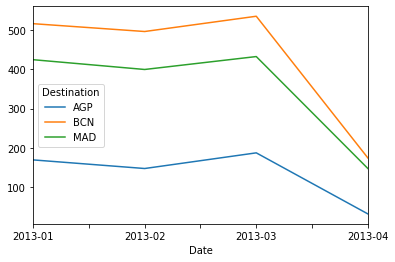

In [26]:
#Por último, sacamos el plot para los tres aeropuertos
plot_s = s_gr.pivot('Date','Destination','Count')
plot_s.plot()

4) Ajustar el código para trabajar con Big Data

Por último, ajustamos el código anterior para trabajar con Big Data aplicando los Chunks:

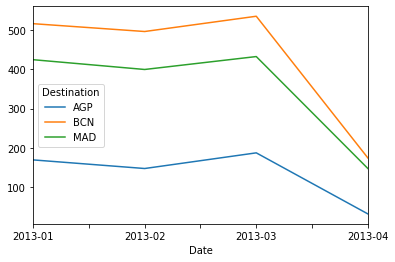

In [27]:
#Leemos el fichero 'searches' fijando el número de filas que importaremos al DF en cada iteración con el tamaño de los Chunks.
#Transformamos el formato del campo 'Date' de 'object' a 'Datetime'.
size_sm = 100000
size_chk = 35000
sk = pd.read_csv('./searches.csv.bz2', sep = "^", usecols = ['Date','Destination'], 
                 parse_dates = ['Date'], nrows = size_sm, chunksize = size_chk) 
#Creamos un DF vacío donde vamos a ir añadiendo los resultados de los Chunks
sk_chunks = pd.DataFrame()

#Para cada iteración de tamaño definido en el 'chunksize', filtraremos por los tres aeropuertos, sacaremos el año-mes para agrupar por año-mes y destino,
#contabilizaremos el nº de veces que se realiza una búsqueda por fecha a cada aeropuerto, y los iremos añadiendo a un DF vacío.
for i, s in enumerate(sk):
    s = s.dropna() #eliminamos los NaN
    s = s[ s['Destination'].isin(['AGP','BCN','MAD'])]
    s['YearMonth'] = s['Date'].apply(lambda x:x.strftime('%Y-%m'))
    s['Date'] = s['YearMonth'].str[:7]
    s_gr = s.groupby(['Date', 'Destination']).count()
    s_gr = s_gr.rename(columns={'YearMonth':'Count'})
    s_gr = s_gr.reset_index()
    sk_chunks = sk_chunks.append(s_gr)
    
#Volvemos a agrupar por año-mes y destino, sumar el nº de las búsquedas de vuelos a los tres aeuropuertos en cada una de las fechas
#y restablecer el índice. Pero esta vez, para el DF obtenido de las iteraciones.
sk_gr = sk_chunks.groupby(['Date', 'Destination']).sum()
sk_gr.reset_index(inplace = True)

#Por último, sacamos el plot para los tres aeropuertos.
plot_sk = sk_gr.pivot('Date','Destination','Count')
plot_sk.plot()